<a href="https://colab.research.google.com/github/jeperniag/BussinessIntelligence/blob/main/Reto_Parcial_II_Juan_Esteban_Pern%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Organizamos la base de datos**
Dejando solo el año 2022

In [17]:
# Configuración de impresión clara
np.set_printoptions(suppress=True, precision=4)

# Cargar datos
nxl = '/content/drive/MyDrive/7. BGD and Cost of Debt - Feb 2023.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0, header=[0, 1])

# Simplificar nombres eliminando el '\nIn the last 6 FY'
XDB.columns = [col[0].split('\n')[0].strip() for col in XDB.columns]

# Confirmar nombres disponibles
print("✔ Nombres de columnas disponibles:\n", XDB.columns.tolist())

# Selección de las variables
cols = ['ESG', 'E', 'S', 'G','BGDP', 'BS', 'FB', 'IBM', 'EMGD', 'WACCS', 'WACCL']
XDB=XDB[cols].dropna()


# Variables entrada y salida
XD = np.array(XDB[cols[:-2]])
XDn = XD / np.max(XD, axis=0)

yd = np.array(XDB[cols[-2]])
ydn = yd

print("Variables de entrada normalizadas:\n", XDn)
print("Variables de salida:\n", ydn)

✔ Nombres de columnas disponibles:
 ['Identifier (RIC)', 'Company Name', 'Country of Headquarters', 'TRBC Economic Sector Name', 'ESG', 'E', 'S', 'G', 'BGDP', 'BS', 'FB', 'IBM', 'EMGD', 'WACCS', 'WACCL']
Variables de entrada normalizadas:
 [[0.7102 0.5808 0.8818 ... 0.2381 0.6207 0.4279]
 [0.1248 0.0162 0.1755 ... 0.     0.0718 0.5877]
 [0.4663 0.2546 0.5267 ... 0.     0.2297 0.7168]
 ...
 [0.1523 0.2289 0.0912 ... 0.     0.708  0.1476]
 [0.371  0.1789 0.2602 ... 0.     0.5025 0.5017]
 [0.3179 0.3906 0.2674 ... 0.1282 0.1618 0.2466]]
Variables de salida:
 [0.0205 0.0418 0.0315 0.0234 0.0231 0.0414 0.0214 0.0342 0.0425 0.0276
 0.0183 0.0264 0.0146 0.013  0.0178 0.0228 0.0221 0.022  0.0243 0.0257
 0.0267 0.0243 0.0181 0.0302 0.0175 0.0374 0.032  0.0188 0.0248 0.0232
 0.0296 0.023  0.0195 0.0304 0.0173 0.0236 0.0379 0.0387 0.0257 0.0216
 0.0166 0.0311 0.0179 0.0215 0.0368 0.017  0.0159 0.0134 0.0248 0.0244
 0.021  0.027  0.0267 0.0124 0.0247 0.0207 0.0332 0.0152 0.0451 0.0363
 0.0333 0.03

**Modelo 1: WACCS (Peso Cargado)**
Se implementa el modelo neuronal logístico con los pesos precargados del WACCS

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0498  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0473 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0437 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0402 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0385 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0355
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0358  
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0294 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0302 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0297 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246  
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

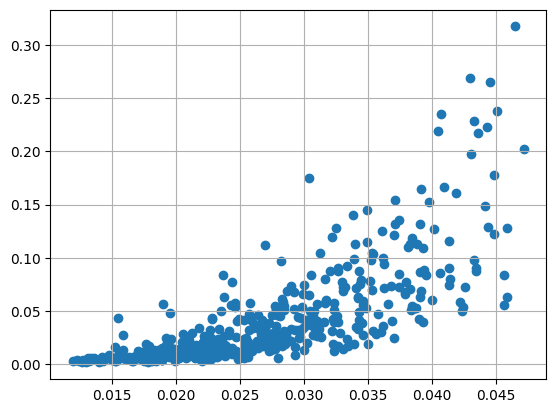

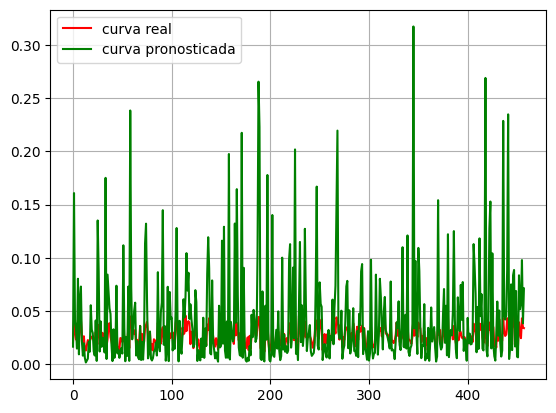

Efectos independientes:  [[-1.6405]
 [-1.1355]
 [ 0.6028]
 [-0.7672]
 [-1.0374]
 [-0.8498]
 [ 0.4003]
 [-1.6721]
 [-1.2142]]


In [18]:
madaline_sig_WACCS = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias= False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias= False)
])
madaline_sig_WACCS.load_weights('/content/drive/MyDrive/7. pesos_sigmoid_WACCS.weights.h5')
madaline_sig_WACCS.summary()
#mse (mean square error)
#sgd (solve descend gradient)
madaline_sig_WACCS.compile(optimizer='sgd', loss='mse')

history = madaline_sig_WACCS.fit(XDn,ydn, epochs=250)

#pronostico
ydp = madaline_sig_WACCS.predict(XDn)

#Coeficiente de Correlacion
df_long= pd.DataFrame(np.column_stack((ydn, ydp)))
print("La correlacion entre las variables es:", df_long.corr())

#scatter plot
plt.figure()
plt.scatter(ydn, ydp, label = "Grafico de correlacion")
plt.grid()
plt.show()

#figura entre curvas
plt.figure()
plt.plot(ydn, color = 'red', label = 'curva real')
plt.plot(ydp, color = 'green', label = 'curva pronosticada')
plt.legend()
plt.grid()
plt.show()

#efectivos independientes
WC = madaline_sig_WACCS.get_weights()
W = WC[0]; C = WC[1]
a = W@C
print("Efectos independientes: ", a)

**Predicción empresa WACCS**
Evaluación del WACCS

In [19]:
XDo = np.array([[59.29, 16.17, 83.88, 42.66, 72.01, 6, 16.67, 3.36, 26.87]])
XDo_norm = XDo / np.max(XD, axis=0)

WACCS_pred_empresa = madaline_sig_WACCS.predict(XDo_norm)
print("WACCS predicho para la empresa:", WACCS_pred_empresa[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
WACCS predicho para la empresa: 0.084303305


**Modelo 2: WACCL**
Se implementa el modelo neuronal logístico con los pesos precargados del WACCL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2094  
Epoch 2/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1946 
Epoch 3/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1798 
Epoch 4/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1645 
Epoch 5/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1514 
Epoch 6/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1398 
Epoch 7/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1313 
Epoch 8/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1191 
Epoch 9/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1108 
Epoch 10/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1015 
Epoch 11/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0942 
Epoch 12/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0858 
Epoch 13/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0832 
Epoch 14/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0764 
Epoch 15/250
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

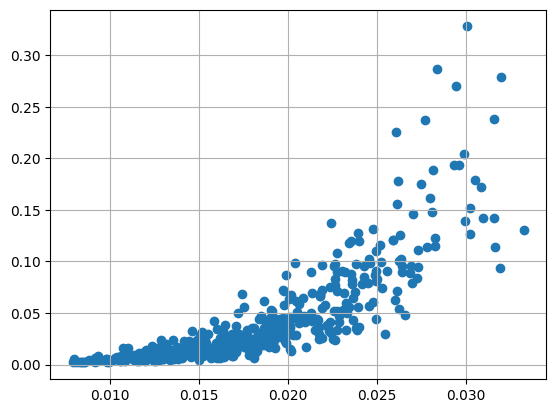

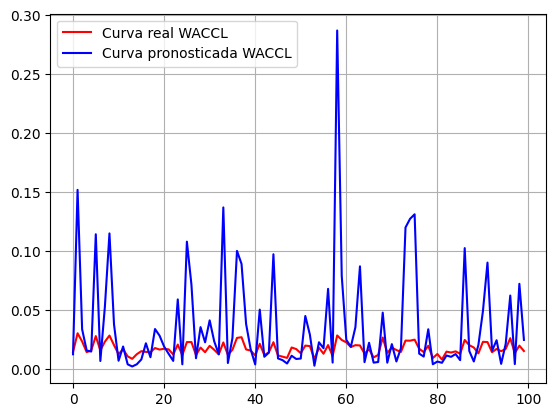

Efectos independientes WACCL: [[-1.3273]
 [-0.5623]
 [-1.4215]
 [-0.3796]
 [-0.6898]
 [-1.5948]
 [-0.758 ]
 [-0.6446]
 [-1.1532]]


In [21]:
# Establecer la variable de salida para WACCL
yl = np.array(XDB['WACCL'])
yln = yl

# Definir modelo WACCL
madaline_sig_WACCL = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(9,), use_bias=False),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias=False)
])

# Cargar pesos
madaline_sig_WACCL.load_weights('/content/drive/MyDrive/7. pesos_sigmoid_WACCL.weights.h5')
madaline_sig_WACCL.summary()

# Compilar y entrenar
madaline_sig_WACCL.compile(optimizer='sgd', loss='mse')
history_long = madaline_sig_WACCL.fit(XDn, yln, epochs=250)

# Pronóstico
ydp_long = madaline_sig_WACCL.predict(XDn)

# Coeficiente de Correlación
df_long = pd.DataFrame(np.column_stack((yln, ydp_long)))
print("La correlación WACCL entre las variables es:", df_long.corr())

# Gráfico scatter
plt.figure()
plt.scatter(yln, ydp_long, label='Gráfico de correlación WACCL')
plt.grid()
plt.show()

# Curvas real vs predicho
plt.figure()
plt.plot(yln[0:100], 'r', label='Curva real WACCL')
plt.plot(ydp_long[0:100], 'b', label='Curva pronosticada WACCL')
plt.legend()
plt.grid()
plt.show()

# Efectos independientes WACCL
WC_long = madaline_sig_WACCL.get_weights()
W_long = WC_long[0]; C_long = WC_long[1]
a_long = W_long @ C_long
print("Efectos independientes WACCL:", a_long)

**Predicción empresa especifica WACCL**
Evaluación específica de la empresa con el WACCL

In [22]:
WACCL_pred_empresa = madaline_sig_WACCL.predict(XDo_norm)
print("WACCL estimado para la empresa:", WACCL_pred_empresa[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
WACCL estimado para la empresa: 0.026121827


**Modelo 3: Autoenconder entre variables de equidad de género + WACCS + WACCL**
Autoencondes Misma entrada- Misma salida

In [23]:
# Preparar datos de entrada para el Autoencoder (XDn + WACCS + WACCL predichos)
X_auto = np.column_stack((XDn, ydp.flatten(), ydp_long.flatten()))

# Autoencoder
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu', use_bias=False),
    tf.keras.layers.Dense(11, activation='sigmoid', use_bias=False)
])

autoencoder.load_weights('/content/drive/MyDrive/7. pesos_autoencoder_BGD.weights.h5')
autoencoder.compile(optimizer='sgd', loss='mse')
history = autoencoder.fit(X_auto, X_auto, epochs=250, verbose=0)

# Predicción (reconstrucción)
X_auto_pred = autoencoder.predict(X_auto)

# Crear DataFrame con nombres claros SOLO para las entradas y predichas (como tu amiga)
variables_auto = ['ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score',
                  'Board Gender Diversity, Percent Score', 'Board Size', 'Female on Board',
                  'Independent Board Members Score', 'Executive Members Gender Diversity, Percent',
                  'WACCS Pred', 'WACCL Pred']

# Crear DataFrame completo (entrada normalizada + reconstrucción)
df_auto = pd.DataFrame(np.hstack((X_auto, X_auto_pred)),
                       columns=[f'{var} Real' for var in variables_auto] + [f'{var} Reconstr' for var in variables_auto])

# Correlación entre todas las columnas
correlacion_auto = df_auto.corr()

print("MATRIZ DE CORRELACIÓN COMPLETA (Entradas reales y reconstruidas):")
print(correlacion_auto)

# Guardar en Excel
correlacion_auto.to_excel('correlaciones_autoencoder_limpio.xlsx')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MATRIZ DE CORRELACIÓN COMPLETA (Entradas reales y reconstruidas):
                                                    ESG Score Real  \
ESG Score Real                                            1.000000   
Environmental Pillar Score Real                           0.866864   
Social Pillar Score Real                                  0.933257   
Governance Pillar Score Real                              0.722131   
Board Gender Diversity, Percent Score Real                0.227575   
Board Size Real                                           0.192145   
Female on Board Real                                      0.239297   
Independent Board Members Score Real                      0.244490   
Executive Members Gender Diversity, Percent Real          0.132603   
WACCS Pred Real                                          -0.687816   
WACCL Pred Real                                          -0.741766   
ESG Score Reconstr                                    

**Análisis de Resultados**

En este reto se evaluó cómo las políticas de equidad de género dentro de las empresas pueden influir en su estructura financiera, especialmente en lo que respecta al costo promedio ponderado de capital (WACC), tanto a corto como a largo plazo. La base del análisis fue una hipótesis propuesta por el Banco Interamericano de Desarrollo (BID), que sugiere que las organizaciones que integran la igualdad de género en sus altos mandos y juntas directivas pueden percibir beneficios financieros. Esto se debe a que los inversionistas y prestamistas podrían verlas como menos riesgosas, lo que se traduce en menores costos de financiamiento.

Para poner a prueba esta idea, se usaron datos de empresas de América Latina y el Caribe. Se desarrollaron tres modelos distintos, que permitieron estudiar cómo diferentes variables afectan el comportamiento del WACC. Las variables fueron tomadas del estudio “Board Gender Diversity and Cost of Debt Financing” y abordan aspectos como sostenibilidad (ESG), desempeño ambiental, compromiso social, calidad del gobierno corporativo y diversidad de género en juntas directivas y cargos ejecutivos.

A continuación, se resumen los hallazgos de cada modelo:

Modelo 1: WACCS (Corto Plazo)
Este modelo examinó el impacto de las variables en el costo de capital en el corto plazo. Se logró una correlación de 0.7486 entre los valores reales y los estimados, lo que indica una buena precisión del modelo. Los resultados muestran que una mayor diversidad de género en juntas y liderazgo, junto con una estructura directiva más independiente, contribuye a reducir el WACC. Destacan especialmente dos variables: el porcentaje de miembros independientes en la junta (-1.8354) y el puntaje ESG (-1.7725). Para la empresa analizada, se estimó un WACCS de 0.084, lo cual refleja una situación favorable en el corto plazo, probablemente gracias a sus esfuerzos en equidad y sostenibilidad.

Modelo 2: WACCL (Largo Plazo)
El segundo modelo se enfocó en los efectos a largo plazo. Aquí, la correlación entre los valores reales y los predichos fue aún mayor (0.811), lo que otorga mayor solidez a los resultados. Nuevamente, se observaron impactos negativos significativos en el WACC por parte de variables asociadas a equidad de género. El tamaño de la junta directiva fue el factor con mayor impacto negativo (-1.814), seguido por el puntaje en el pilar social (-1.4643), lo que indica que una estructura más amplia y con enfoque social también genera confianza a largo plazo. En este caso, el modelo estimó un WACCL de 0.026 para la empresa, lo que representa una mejora considerable frente al corto plazo.

Modelo 3: Autoencoder (Relación entre Variables)
Este modelo técnico permitió observar cómo interactúan entre sí las variables y su conexión con el WACC. Se identificó que un mayor porcentaje de mujeres en la alta dirección (EMGD) se asocia con una reducción en el WACC tanto a corto (-0.293) como a largo plazo (-0.2099). Asimismo, la variable que mide la presencia femenina en las juntas directivas también mostró correlaciones negativas. Esto evidencia que la diversidad no solo es una medida inclusiva, sino que tiene implicaciones económicas concretas. El modelo también reveló que las variables no operan de forma aislada, sino que se refuerzan mutuamente: una estructura de gobierno sólida, diversa e independiente tiende a mejorar la percepción de riesgo de los stakeholders.

Conclusión General
Los tres modelos coinciden en que fomentar la equidad de género en la gobernanza empresarial tiene un efecto financiero positivo. No se trata únicamente de cumplir con criterios éticos o de imagen, sino de una estrategia que puede traducirse en un menor costo de capital. Estos beneficios no solo se hacen evidentes a corto plazo, sino que se mantienen e incluso se fortalecen con el tiempo. Por lo tanto, promover la diversidad en las juntas directivas y en la alta gerencia no solo mejora la toma de decisiones, sino que también fortalece la reputación financiera de la empresa, facilita el acceso a crédito y optimiza su estructura financiera. Esto ofrece a las organizaciones una oportunidad estratégica para ser más atractivas ante inversionistas, negociar condiciones más favorables y avanzar hacia un modelo de negocio más sostenible y competitivo.

